In [1]:
%time
from numpy import array, dot
from qpsolvers import solve_qp

M = array([[1., 2., 0.], [-8., 3., 2.], [0., 1., 1.]])
P = dot(M.T, M)  # quick way to build a symmetric matrix
q = dot(array([3., 2., 3.]), M).reshape((3,))
G = array([[1., 2., 1.], [2., 0., 1.], [-1., 2., -1.]])
h = array([3., 2., -2.]).reshape((3,))
A = array([1., 1., 1.])
b = array([1.])

print("QP solution:", solve_qp(P, q, G, h, A, b))


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


/home/rilevin/miniconda3/envs/mmort/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


QP solution: [ 0.30769231 -0.69230769  1.38461538]


In [1]:
import numpy as np
import scipy.optimize
LHS = np.load('nnls_LHS.npy', allow_pickle = True)

/home/rilevin/miniconda3/envs/mmort/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
RHS = np.load('nnls_RHS.npy', allow_pickle = True)

In [3]:
LHS

array(<37386x18647 sparse matrix of type '<class 'numpy.float64'>'
	with 28981698 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [4]:
RHS

array([ 12.79973191,  13.14349167,  13.26035877, ...,   0.87443094,
       112.45822314,   1.81004721])

In [120]:
%%time
u_next = scipy.optimize.lsq_linear(LHS[()], RHS, bounds = (0, np.inf), tol=1e-3, lsmr_tol=1e-3, max_iter=50, verbose=2).x

   Iteration        Cost      Cost reduction    Step norm     Optimality   
       0         7.0917e+06                                    7.07e+05    
       1         5.5532e+05      6.54e+06       5.53e+00       8.40e+04    
       2         3.2485e+05      2.30e+05       1.42e+00       8.42e+03    
       3         2.8916e+05      3.57e+04       2.41e+00       1.52e+03    
       4         2.7280e+05      1.64e+04       2.84e+00       8.17e+02    
       5         2.6790e+05      4.90e+03       1.02e+00       7.89e+02    
       6         2.6201e+05      5.88e+03       1.36e+00       7.40e+02    
       7         2.6072e+05      1.29e+03       3.17e-01       7.33e+02    
       8         2.5839e+05      2.33e+03       5.97e-01       7.11e+02    
       9         2.5754e+05      8.53e+02       2.25e-01       7.06e+02    
      10         2.5579e+05      1.75e+03       4.77e-01       6.92e+02    
      11         2.5530e+05      4.88e+02       1.35e-01       6.86e+02    
      12    

In [7]:
28981698/(37386*18647)

0.0415724724490278

In [17]:
LHS[()].T.dot(LHS[()])

<18647x18647 sparse matrix of type '<class 'numpy.float64'>'
	with 65695158 stored elements in Compressed Sparse Column format>

In [18]:
65695158/(18647*18647)

0.18893630593825222

In [21]:
D = np.diag(np.arange(10))

In [11]:
A = np.random.randn(10,10)

U,S,Vt = np.linalg.svd(A)

In [18]:
P = np.random.choice(np.arange(10), 4)

In [39]:
P = [1,3,4,9]

In [20]:
U1, S1, Vt1 = np.linalg.svd(A[P][:,P])

In [25]:
U[P].dot(np.diag(S)).dot(Vt[:,P])

array([[ 0.51582448, -0.81654097,  0.95151204,  0.99315119],
       [-0.08406318,  0.11925694,  1.96232041,  1.33864881],
       [-0.98998461,  1.25758665,  2.67232202,  1.04606496],
       [ 0.55165747, -0.10236989,  1.64101146, -0.78055326]])

In [40]:
L = np.linalg.cholesky(A.T.dot(A))

In [41]:
A1 = A[P][:,P]
L1 = np.linalg.cholesky(A1.T.dot(A1))

In [42]:
L[P].dot(L[P].T) 

array([[ 3.00981102, -1.33020858,  0.88506443,  2.78924718],
       [-1.33020858,  7.17419922,  1.77343897, -0.29514458],
       [ 0.88506443,  1.77343897,  8.20099224,  7.19253091],
       [ 2.78924718, -0.29514458,  7.19253091, 15.28562295]])

In [43]:
L[P]

array([[-6.88483406e-02,  1.73351404e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.36158979e+00, -8.21425002e-01, -5.83714448e-01,
         2.07480381e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.86728552e-01,  4.83286716e-01, -4.34675295e-01,
         4.73130965e-01,  2.66139711e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.32902102e-01,  1.59976337e+00, -1.19879882e+00,
         9.96590152e-04,  2.15596772e+00,  1.44138372e+00,
         1.39214098e+00, -4.84362373e-01,  1.44355997e+00,
         5.02697189e-01]])

In [44]:
L1

array([[ 0.76833369,  0.        ,  0.        ,  0.        ],
       [-1.07589808,  1.89845856,  0.        ,  0.        ],
       [-0.31359244,  1.52367544,  1.0447803 ,  0.        ],
       [ 1.07633064,  0.86383804,  0.45865957,  1.38920638]])

In [26]:
A[P][:,P]

array([[ 0.51582448, -0.81654097,  0.95151204,  0.99315119],
       [-0.08406318,  0.11925694,  1.96232041,  1.33864881],
       [-0.98998461,  1.25758665,  2.67232202,  1.04606496],
       [ 0.55165747, -0.10236989,  1.64101146, -0.78055326]])

In [22]:
U1

array([[-0.24102552, -0.67670116, -0.42946161,  0.54730701],
       [-0.54995205, -0.19879823, -0.32518904, -0.74315819],
       [-0.7554783 ,  0.52564776,  0.08282673,  0.38221291],
       [-0.2621297 , -0.47565663,  0.83842384, -0.04565351]])

In [56]:
I = np.random.randn(5, 10)
subsample = [1,3,4]

In [57]:
Q, R = np.linalg.qr(I, mode='complete')

In [58]:
Q

array([[-0.18120632,  0.0142086 ,  0.1658266 , -0.94868183,  0.19866231],
       [-0.3213745 , -0.02469464, -0.00851101, -0.13662145, -0.93668071],
       [-0.62410213,  0.50272996, -0.56085739,  0.06970533,  0.19580417],
       [ 0.65100325,  0.18195754, -0.65904685, -0.2749472 , -0.18206458],
       [-0.22488665, -0.84459596, -0.47278466, -0.02970815,  0.1080544 ]])

In [61]:
R

array([[ 1.9588682 ,  0.30488723, -0.69367699,  0.58317561,  0.23644199,
        -0.77288415,  0.41594253, -2.30539522, -0.27630809, -2.79406726],
       [ 0.        ,  1.28078078,  1.37990741, -1.88151755, -1.29825765,
         0.0384783 ,  0.4111935 , -1.14398434,  0.30320742,  0.21102925],
       [ 0.        ,  0.        ,  0.61413754,  0.2831482 ,  1.20772289,
        -0.86170502, -0.3573061 , -1.57063178, -0.14841972, -0.69493263],
       [ 0.        ,  0.        ,  0.        ,  1.27598448,  1.20154414,
         0.60857628,  0.84683312,  1.31965267, -0.55657986, -0.86159669],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.19077366,
        -1.57114106, -0.5760756 , -0.6734516 , -0.56609876, -1.41249567]])

In [83]:
import numpy as np
import scipy

def fnnls(AtA, Aty, epsilon=None, iter_max=None):
    """
    Given a matrix A and vector y, find x which minimizes the objective function
    f(x) = ||Ax - y||^2.
    This algorithm is similar to the widespread Lawson-Hanson method, but
    implements the optimizations described in the paper
    "A Fast Non-Negativity-Constrained Least Squares Algorithm" by
    Rasmus Bro and Sumen De Jong.
    Note that the inputs are not A and y, but are
    A^T * A and A^T * y
    This is to avoid incurring the overhead of computing these products
    many times in cases where we need to call this routine many times.
    :param AtA:       A^T * A. See above for definitions. If A is an (m x n)
                      matrix, this should be an (n x n) matrix.
    :type AtA:        numpy.ndarray
    :param Aty:       A^T * y. See above for definitions. If A is an (m x n)
                      matrix and y is an m dimensional vector, this should be an
                      n dimensional vector.
    :type Aty:        numpy.ndarray
    :param epsilon:   Anything less than this value is consider 0 in the code.
                      Use this to prevent issues with floating point precision.
                      Defaults to the machine precision for doubles.
    :type epsilon:    float
    :param iter_max:  Maximum number of inner loop iterations. Defaults to
                      30 * [number of cols in A] (the same value that is used
                      in the publication this algorithm comes from).
    :type iter_max:   int, optional
    """
    if epsilon is None:
        epsilon = np.finfo(np.float64).eps

    n = AtA.shape[0]

    if iter_max is None:
        iter_max = 30 * n

    if Aty.ndim != 1 or Aty.shape[0] != n:
        raise ValueError('Invalid dimension; got Aty vector of size {}, ' \
                         'expected {}'.format(Aty.shape, n))

    # Represents passive and active sets.
    # If sets[j] is 0, then index j is in the active set (R in literature).
    # Else, it is in the passive set (P).
    sets = np.zeros(n, dtype=np.bool)
    # The set of all possible indices. Construct P, R by using `sets` as a mask
    ind = np.arange(n, dtype=int)
    P = ind[sets]
    R = ind[~sets]

    x = np.zeros(n, dtype=np.float64)
    w = Aty
    s = np.zeros(n, dtype=np.float64)

    i = 0
    # While R not empty and max_(n \in R) w_n > epsilon
    while not np.all(sets) and np.max(w[R]) > epsilon and i < iter_max:
        # Find index of maximum element of w which is in active set.
        j = np.argmax(w[R])
        # We have the index in MASKED w.
        # The real index is stored in the j-th position of R.
        m = R[j]

        # Move index from active set to passive set.
        sets[m] = True
        P = ind[sets]
        R = ind[~sets]

        # Get the rows, cols in AtA corresponding to P
        AtA_in_p = AtA[P][:, P]
        # Do the same for Aty
        Aty_in_p = Aty[P]

        # Update s. Solve (AtA)^p * s^p = (Aty)^p
        s[P] = np.linalg.lstsq(AtA_in_p, Aty_in_p, rcond=None)[0]
        s[R] = 0.

        while np.any(s[P] <= epsilon):
            print('Next iter, cur x {} cur w {}'.format(x,w))
            i += 1

            mask = (s[P] <= epsilon)
            alpha = np.min(x[P][mask] / (x[P][mask] - s[P][mask]))
            x += alpha * (s - x)

            # Move all indices j in P such that x[j] = 0 to R
            # First get all indices where x == 0 in the MASKED x
            zero_mask = (x[P] < epsilon)
            # These correspond to indices in P
            zeros = P[zero_mask]
            # Finally, update the passive/active sets.
            sets[zeros] = False
            P = ind[sets]
            R = ind[~sets]

            # Get the rows, cols in AtA corresponding to P
            AtA_in_p = AtA[P][:, P]
            # Do the same for Aty
            Aty_in_p = Aty[P]

            # Update s. Solve (AtA)^p * s^p = (Aty)^p
            s[P] = np.linalg.lstsq(AtA_in_p, Aty_in_p, rcond=None)[0]
            s[R] = 0.

        x = s.copy()
        w = Aty - AtA.dot(x)
    return x

In [7]:
A, b = LHS[()], RHS
AtA = A.T.dot(A)
Atb = A.T.dot(b)

In [82]:
# AtA = AtA.toarray()
# Atb = Atb.toarray()

In [84]:
%%time
x = fnnls(AtA, Atb, 1e-8, 30)

Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 340.66940073  400.65546093  318.19990731 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 311.25801632  285.5466971   235.27358052 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 331.51388032  289.91566637  300.54343492 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 277.10141999  239.8163177   255.4006283  ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 222.07072585  178.97720927  200.00128244 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 191.29290449  191.94420903  182.41889837 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] cur w [ 110.45395183   88.40777159  150.82473394 ... 1364.16172009 1369.9879704
 1350.21610596]
Next iter, cur x [0. 0. 0. ... 0. 0. 0.] 

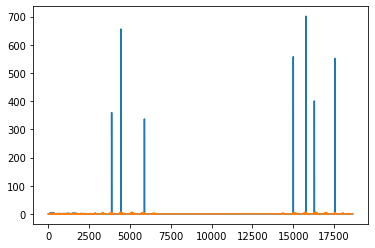

In [111]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x)
plt.plot(u_next)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.plot(x)
plt.plot(u_next - u_next1)
# plt.plot(u_next1)

NameError: name 'u_next' is not defined

In [105]:
fun(x, A, b, AtA, Atb)

5808056.760697987

In [152]:
fun(res.x, A, b, AtA, Atb)

44531729.10508881

In [143]:
fun(res.x, A, b, AtA, Atb)

304378.1709474614

In [122]:
fun(u_next, A, b, AtA, Atb)

246510.2175787642

In [123]:
fun(u_next1, A, b, AtA, Atb)

368597.66034185316

In [108]:
fun(u_next, A, b, AtA, Atb)

246510.2175787642

In [90]:
AtA

array([[19.82911855,  7.28435907,  5.24591194, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.28435907, 18.18018112,  5.44314567, ...,  0.        ,
         0.        ,  0.        ],
       [ 5.24591194,  5.44314567, 16.15755947, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 25.14331311,
        24.05842185, 22.16792159],
       [ 0.        ,  0.        ,  0.        , ..., 24.05842185,
        24.35524721, 23.14159515],
       [ 0.        ,  0.        ,  0.        , ..., 22.16792159,
        23.14159515, 22.98773504]])

In [70]:
AtA.ndim

2

In [72]:
Atb.shape[0]

18647

In [92]:
# AtA     = A'*A; Ab = A'*b;
# grad2    = @(x) 2*( AtA*x - Ab );bnds = ((0.25, 0.75), (0, 2.0))

In [97]:
%%time
AtA.dot(x)

CPU times: user 167 ms, sys: 128 ms, total: 295 ms
Wall time: 293 ms


array([21359.23256198, 18705.5785539 , 15336.14699814, ...,
          81.11286766,   101.83600344,   125.08596645])

In [8]:
AA = AtA.toarray()

In [99]:
%%time
AA.dot(x)

CPU times: user 1.43 s, sys: 2.51 s, total: 3.94 s
Wall time: 99 ms


array([21359.23256198, 18705.5785539 , 15336.14699814, ...,
          81.11286766,   101.83600344,   125.08596645])

In [94]:
65695158/(18647*18647)

0.18893630593825222

In [9]:
import numpy as np
from scipy.optimize import minimize
# from numdifftools import Jacobian, Hessian

def fun(x, A, b, AtA, Atb):
    return (1/2)*np.linalg.norm(A.dot(x) - b)**2

def grad(x, A, b, AtA, Atb):
    return AtA.dot(x) - Atb 

# def fun_der(x, a):
#     return Jacobian(lambda x: fun(x, a))(x).ravel()

def hess(x, A, b, AtA, Atb):
    return AtA

x0 = np.zeros(AtA.shape[1])

bnds = [(0, np.inf)]*x0.shape[0]

In [10]:
%%time
A.dot(x0)

CPU times: user 44 ms, sys: 4 ms, total: 48 ms
Wall time: 46.8 ms


array([0., 0., 0., ..., 0., 0., 0.])

In [138]:
A1 = A.toarray()

In [79]:
max(-1,0)

0

In [139]:
%%time 
A1.dot(x0)

CPU times: user 2.15 s, sys: 8.9 s, total: 11 s
Wall time: 278 ms


array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
obj_hist = []
def callbackF(Xi):
    obj_hist.append(fun(Xi, A, b, AtA, Atb))
    return 

In [77]:
%%time
res = minimize(fun, x0, args=(A, b, AA, Atb), tol = 1e-5, method='L-BFGS-B', jac=grad, bounds=bnds,callback=callbackF,
               options = {'maxiter': 100,'disp':True})
print(res)


      fun: 289314.27588174265
 hess_inv: <18647x18647 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.8273553 , 12.56588738,  2.88200665, ...,  1.64480107,
        1.38341675,  1.18285424])
  message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
     nfev: 106
      nit: 100
   status: 1
  success: False
        x: array([3.90629871e-05, 0.00000000e+00, 2.75451268e-05, ...,
       2.15107382e-01, 2.16071630e-01, 2.12952043e-01])
CPU times: user 7min 58s, sys: 27.6 s, total: 8min 26s
Wall time: 12.7 s


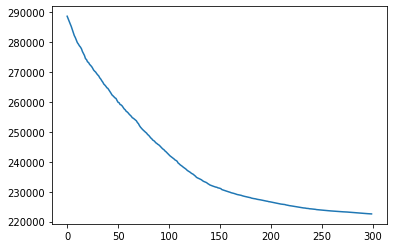

In [73]:
plt.plot(obj_hist[100:])

In [81]:
%%time
res = minimize(fun, x0, args=(A, b, AA, Atb), method='trust-constr', jac=grad, hess = hess, bounds=bnds, options = {'maxiter': 10,'xtol': 1e-05, 'gtol': 1e-03, 'barrier_tol': 1e-03, 'verbose': 2,
                                                                                                    'disp':True})
print(res)


| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | +5.6608e+08 | 1.00e+00 | 3.62e+06 | 0.00e+00 |
|   2   |   2   |   1   | +5.1544e+08 | 7.00e+00 | 3.51e+06 | 0.00e+00 |
|   3   |   3   |   2   | +2.3831e+08 | 4.90e+01 | 2.43e+06 | 0.00e+00 |
|   4   |   4   |  11   | +4.0760e+07 | 3.20e+02 | 2.21e+05 | 4.86e-01 |
|   5   |   5   | 1256  | +8.8858e+05 | 1.61e+03 | 1.66e+04 | 4.15e+01 |


KeyboardInterrupt: 

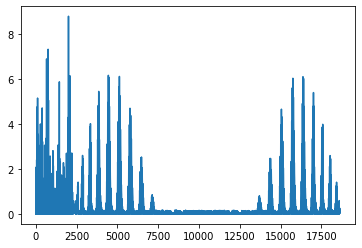

In [13]:
plt.plot(res.x)
# plt.plot(u_next)

In [ ]:
res.

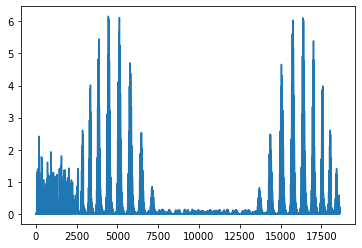

In [78]:
plt.plot(res.x)

In [15]:
fun(res.x, A, b, AtA, Atb)

220657.26219705868

In [17]:
fun(res.x, A, b, AtA, Atb)

219157.02564337058